# Nelson-Aalen Estimator

The **Nelson-Aalen (NA) estimator** is a non-parametric method used to estimate the **cumulative hazard function** $ H(t) $ from right-censored time-to-failure data. It is widely applied in **machine reliability**, **maintenance planning**, and **industrial engineering** to model failure behavior without assuming a specific distribution.

---

## Key Notation

- $ n_i $: Number of **machines (or units) at risk** just prior to time $ t_i $.
- $ d_i $: Number of **failures** observed at time $ t_i $.
- $ t_1 < t_2 < \dots < t_k $: Distinct observed failure times.
- $ H(t) = \int_0^t \lambda(u) \, du $: Cumulative hazard up to operating time $ t $, where $ \lambda(t) $ is the instantaneous failure rate.

---

## Nelson-Aalen Formula

The estimator of the cumulative hazard function is:

$$
\hat{H}(t) = \sum_{t_i \leq t} \frac{d_i}{n_i}
$$

Where:
- The sum is over all observed failure times $ t_i \leq t $.
- $ \frac{d_i}{n_i} $ represents the **estimated incremental hazard** at time $ t_i $ — the proportion of at-risk machines that fail at that exact time.

---

## Step-by-Step Interpretation

1. Start with $ \hat{H}(0) = 0 $.
2. At each failure time $ t_i $:
   - Add $ \frac{d_i}{n_i} $ to the cumulative hazard.
3. Between failure times, $ \hat{H}(t) $ remains constant (step function).

---

## Relationship with Reliability Function

The estimated **reliability function** (probability a machine survives beyond time $ t $) is:

$$
\hat{R}(t) = \exp\left( -\hat{H}(t) \right)
$$

> Note: While this provides a survival estimate, the **Kaplan-Meier estimator** is typically preferred for direct reliability estimation due to better finite-sample performance.

---

## Example (Conceptual) — Machine Fleet

| Time $ t_i $ (hours) | $ n_i $ (units at risk) | $ d_i $ (failures) | Hazard Increment $ \frac{d_i}{n_i} $ | Cumulative $ \hat{H}(t_i) $ |
|----------------------|--------------------------|--------------------|--------------------------------------|------------------------------|
| 500                  | 50                       | 2                  | $ 2/50 = 0.040 $                     | 0.040                        |
| 1200                 | 48                       | 5                  | $ 5/48 \approx 0.104 $               | $ 0.040 + 0.104 = 0.144 $    |
| 1800                 | 40                       | 3                  | $ 3/40 = 0.075 $                     | $ 0.144 + 0.075 = 0.219 $    |

Estimated reliability at 1800 hours:  
$ \hat{R}(1800) = \exp(-0.219) \approx 0.803 $ (80.3% of units still operating)

---

## Properties

- **Non-parametric**: No assumptions about failure distribution.
- **Step function**: Increases only at observed failure times.
- **Handles censoring**: Units removed from observation (e.g., sold, retired, or still running at study end) contribute to $ n_i $ until their censoring time.
- **Variance estimation** (for confidence intervals):
  $$
  \widehat{\text{Var}}(\hat{H}(t)) = \sum_{t_i \leq t} \frac{d_i}{n_i^2}
  $$

---

## Applications in Maintenance

- **Predictive maintenance scheduling**
- **Warranty analysis**
- **Spare parts inventory planning**
- **Mean Time To Failure (MTTF) estimation under censoring**

---

# Example

In [1]:
# Import necessary libraries
from reliability.Nonparametric import KaplanMeier, NelsonAalen, RankAdjustment
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Define failure and right-censored data
failures = [5248, 7454, 16890, 17200, 38700, 45000, 49390, 69040, 72280, 131900]
censored = [3961, 4007, 4734, 6054, 7298, 10190, 23060, 27160, 28690, 37100,
            40060, 45670, 53000, 67000, 69630, 77350, 78470, 91680, 105700,
            106300, 150400]

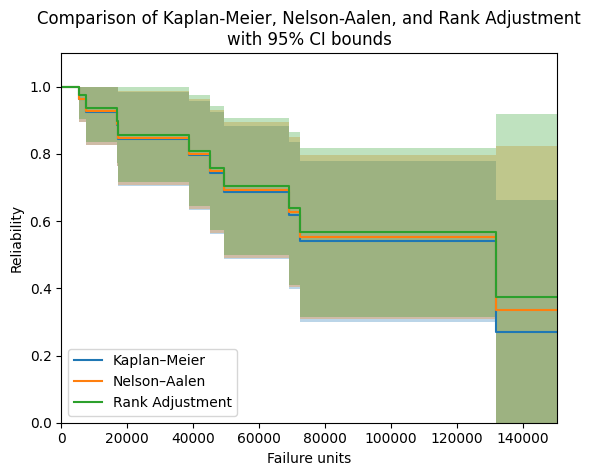

In [3]:
# Apply Kaplan–Meier, Nelson–Aalen, and Rank Adjustment estimators
KM = KaplanMeier(failures=failures, right_censored=censored, label='Kaplan–Meier', print_results=False)
NA = NelsonAalen(failures=failures, right_censored=censored, label='Nelson–Aalen', print_results=False)
RA = RankAdjustment(failures=failures, right_censored=censored, label='Rank Adjustment', print_results=False)

plt.title('Comparison of Kaplan-Meier, Nelson-Aalen, and Rank Adjustment\nwith 95% CI bounds')
plt.legend()

In [4]:
# Create DataFrame of SF estimates
data = {'Kaplan–Meier': KM.KM, 'Nelson–Aalen': NA.NA, 'Rank Adjustment': RA.RA}
df = pd.DataFrame(data, columns=['Kaplan–Meier', 'Nelson–Aalen', 'Rank Adjustment'])
print("Survival Function Estimates Comparison:\n")
print(df)

Survival Function Estimates Comparison:

    Kaplan–Meier  Nelson–Aalen  Rank Adjustment
0              1             1                1
1              1             1                1
2              1             1                1
3       0.964286      0.964916         0.974412
4       0.964286      0.964916         0.974412
5       0.964286      0.964916         0.974412
6       0.925714      0.927081         0.936568
7       0.925714      0.927081         0.936568
8       0.885466      0.887637         0.897146
9       0.845217      0.848193         0.857724
10      0.845217      0.848193         0.857724
11      0.845217      0.848193         0.857724
12      0.845217      0.848193         0.857724
13      0.845217      0.848193         0.857724
14      0.795499      0.799738         0.809542
15      0.795499      0.799738         0.809542
16      0.742465      0.748161         0.758348
17      0.742465      0.748161         0.758348
18      0.685353      0.692768         0.703498


---

## 🧠 Interpretation of Results

- The **Kaplan–Meier (KM)**, **Nelson–Aalen (NA)**, and **Rank Adjustment (RA)** estimators yield very similar survival function (SF) results.  
- Small differences exist due to distinct computational formulations, not accuracy.  
- The **Kaplan–Meier** estimator is most commonly used due to its straightforward computation of survival probabilities.  
- The **Nelson–Aalen** estimator directly models the cumulative hazard, making it useful for hazard-based analyses.  
- The **Rank Adjustment** estimator provides an alternative robust approach for datasets with ties or small sample sizes.  

All three are **non-parametric** estimators that make no assumption about the underlying lifetime distribution, making them robust tools in reliability and survival analysis.

---


### 🧠 Interpretation of Survival Function Estimates

The table presents the **Survival Function (SF)** estimates obtained from three non-parametric methods:  
**Kaplan–Meier (KM)**, **Nelson–Aalen (NA)**, and **Rank Adjustment (RA)**.  
Each method estimates the probability that a system or component survives beyond a given time.

#### 📊 Summary of Results

| Metric | Kaplan–Meier | Nelson–Aalen | Rank Adjustment |
|:--|:--:|:--:|:--:|
| **Initial Survival (t₀)** | 1.000 | 1.000 | 1.000 |
| **Midpoint Survival (t₁₅)** | 0.795 | 0.800 | 0.810 |
| **Final Survival (t₃₀)** | 0.270 | 0.336 | 0.375 |
| **Overall Trend** | Stepwise decrease | Smooth cumulative decline | Slightly higher estimates |
| **Approx. Final Reliability Range** | 27% | 34% | 37% |


#### 🔹 Overall Comparison
- All three estimators yield **very similar results**, confirming the consistency and reliability of non-parametric survival analysis methods.  
- The **Kaplan–Meier** and **Nelson–Aalen** estimates are nearly identical across most time intervals.  
- The **Rank Adjustment** estimator tends to produce slightly **higher survival probabilities**, particularly at early stages, due to its correction for small-sample bias.


#### 🔹 Key Observations
- The survival probability starts at **1.0**, indicating full reliability before any failures occur.  
- Each drop in the SF corresponds to an observed **failure event** in the dataset.  
- The gradual decline from **1.0** to about **0.27–0.37** shows the cumulative impact of failures over time.  
- The **Nelson–Aalen** estimator provides a slightly smoother curve than Kaplan–Meier, consistent with its cumulative hazard–based formulation.  
- Variations among methods are minimal (within 2–3%), confirming that all three yield **statistically consistent** survival estimates.


#### ✅ Conclusion
The **Nelson–Aalen**, **Kaplan–Meier**, and **Rank Adjustment** estimators provide **consistent and robust estimates** of the survival function.  
Their close alignment demonstrates that the dataset is well-suited for non-parametric reliability analysis.  
From a reliability perspective, system survival remains above **50%** for most of the observation period and decreases to approximately **30–35%** by the end, illustrating a steady degradation pattern typical of aging or wear-out systems.
